<a href="https://colab.research.google.com/github/Adarshsinghparihar/Corona_detection_x-ray_Effat-University/blob/master/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/covid-19/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import cv2
from PIL import Image
from os import listdir
import skimage
from skimage.transform import resize
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC # SVC
from sklearn.ensemble import AdaBoostClassifier # AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier
from xgboost import XGBClassifier # XGBClassifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier

In [4]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input

In [5]:
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications.resnet import ResNet50 # ResNet
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

Using TensorFlow backend.


In [6]:
def get_data(folder, X=[], y=[]):
  label = 0
  for folderName in listdir(folder)[1:3]:
    # print(folderName) - used for debugging purposes
    if not folderName.startswith('.') and not folderName.endswith('.ipynb'): # to not consider .DS_Store and .ipynb files
      if folderName in ['normal']:
        label = 0
      elif folderName in ['pneumonia']:
        label = 1
      # elif folderName in ['normal']:
        # label = 2 # for all other types of pnuemonia - label 2 is to be used later on
      # print(label) - used for debugging purposes
      count=0
      for image_filename in tqdm(listdir(folder + folderName)):
        img_file = cv2.imread(folder + folderName + '/' + image_filename)
        if img_file is not None:
          if label == 0 or label == 1 :
            count = count + 1
            if count > 1200:
              break
          img_file = skimage.transform.resize(img_file, (224, 224, 3))
          img_arr = np.asarray(img_file)
          X.append(img_arr)
          y.append(label)
  X = np.asarray(X)
  y = np.asarray(y)
  return X,y


In [7]:
def result(y_test,y_pred_test,name):
    confmat = confusion_matrix(y_test.argmax(axis=1),y_pred_test.argmax(axis=1))
    #Plot Confusion Matrix 
    plt.figure(figsize=(4,4))
    sns.heatmap(confmat, cmap='coolwarm', linecolor='white', linewidths=1, annot=True, fmt='d')
    plt.title('Confusion Matrix '+'('+ str(name) + ')' )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    fig = plt.gcf()
    plt.show();

    print('Accuracy:', np.round(accuracy_score(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)),4))
    print('Precision:', np.round(precision_score(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)),4))
    print('F1 Score:', np.round(f1_score(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)),4))
    print('Cohen Kappa Score:', np.round(cohen_kappa_score(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)),4))
    print('ROC AUC Score:', np.round(roc_auc_score(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)),4))
    print('Recall:', np.round(recall_score(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)),4))

    print('\t\tClassification Report:\n', classification_report(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)))

In [8]:
def result_1(y_train,y_pred_train,name):
    confmat = confusion_matrix(y_train.argmax(axis=1),y_pred_train)
    #Plot Confusion Matrix 
    plt.figure(figsize=(4,4))
    sns.heatmap(confmat, cmap='coolwarm', linecolor='white', linewidths=1, annot=True, fmt='d')
    plt.title('Confusion Matrix '+'('+ str(name) + ')' )
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    fig = plt.gcf()
    plt.show();

    print('Accuracy:', np.round(accuracy_score(y_train.argmax(axis=1),y_pred_train),4))
    print('Precision:', np.round(precision_score(y_train.argmax(axis=1),y_pred_train),4))
    print('F1 Score:', np.round(f1_score(y_train.argmax(axis=1),y_pred_train),4))
    print('Cohen Kappa Score:', np.round(cohen_kappa_score(y_train.argmax(axis=1),y_pred_train),4))
    print('ROC AUC Score:', np.round(roc_auc_score(y_train.argmax(axis=1),y_pred_train),4))
    print('Recall:', np.round(recall_score(y_train.argmax(axis=1),y_pred_train),4))
    print('\t\tClassification Report:\n', classification_report(y_train.argmax(axis=1),y_pred_train))

In [9]:
def plot(name):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(str(name)+' accuracy plot')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(str(name)+' loss plot')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [10]:
#@title 
X,y = get_data(path)

 27%|██▋       | 1200/4371 [07:39<18:46,  2.82it/s]

In [11]:
print(len(X), len(y))


2400 2400


In [12]:
X_train, X_test, y_train, y_test = train_test_split(*shuffle(X, y), test_size=0.1, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(*shuffle(X_train, y_train), test_size=0.1, random_state=1234)
del X,y

In [13]:
y_train = to_categorical(y_train, num_classes=2)  
y_test = to_categorical(y_test, num_classes=2)  
y_val = to_categorical(y_val, num_classes=2)  

#VGG 16


In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input

In [ ]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing


# initialize the training data augmentation object
# # trainAug = ImageDataGenerator(
# 	rotation_range=15,
# 	fill_mode="nearest")

# load the VGG16 network, ensuring the head FC layer sets are left
# off
# baseModel = VGG16(weights="/content/drive/My Drive/Covid-19 project/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5", include_top=False,
# 	input_tensor=Input(shape=(224, 224, 3)))

baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="relu")(headModel)
# headModel = Dropout(0.1)(headModel)
# headModel = Dense(2, activation="softmax")(headModel)
headModel = GlobalAveragePooling2D()(headModel)
headModel = Dense(128, activation='relu')(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network
print("[INFO] training head...")
# H = model.fit_generator(
# 	trainAug.flow(trainX, trainY, batch_size=BS),
# 	steps_per_epoch=len(trainX) // BS,
# 	validation_data=(testX, testY),
# 	validation_steps=len(testX) // BS,
# 	epochs=EPOCHS
# 	callbacks = [cp_callback])

history= model.fit(X_train, y_train, epochs=30, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


[INFO] compiling model...
[INFO] training head...
Epoch 1/30
55/55 [==============================] - 6s 101ms/step - loss: 0.4797 - accuracy: 0.7947 - val_loss: 0.3010 - val_accuracy: 0.9026
Epoch 2/30
55/55 [==============================] - 5s 93ms/step - loss: 0.2876 - accuracy: 0.8954 - val_loss: 0.2220 - val_accuracy: 0.9282
Epoch 3/30
55/55 [==============================] - 5s 93ms/step - loss: 0.2340 - accuracy: 0.9154 - val_loss: 0.2895 - val_accuracy: 0.8974
Epoch 4/30
55/55 [==============================] - 5s 92ms/step - loss: 0.2308 - accuracy: 0.9097 - val_loss: 0.1888 - val_accuracy: 0.9231
Epoch 5/30
55/55 [==============================] - 5s 93ms/step - loss: 0.1881 - accuracy: 0.9337 - val_loss: 0.1805 - val_accuracy: 0.9333
Epoch 6/30
55/55 [==============================] - 5s 93ms/step - loss: 0.1745 - accuracy: 0.9394 - val_loss: 0.1881 - val_accuracy: 0.9179
Epoch 7/30
55/55 [==============================] - 5s 93ms/step - loss: 0.1713 - accuracy: 0.9342 - va

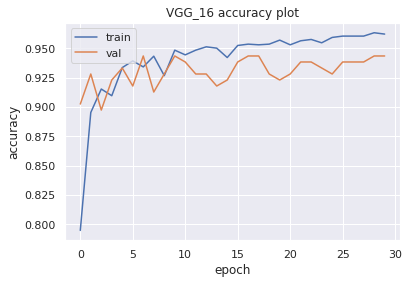

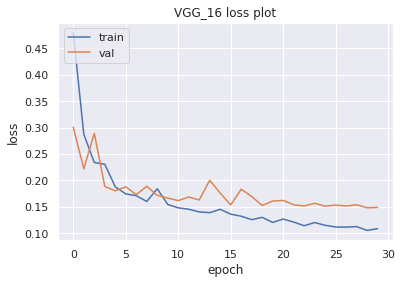

In [ ]:
plot('VGG_16')

61/61 [==============================] - 5s 77ms/step - loss: 0.1059 - accuracy: 0.9604
Score train:  [0.10593456029891968, 0.9603909254074097]


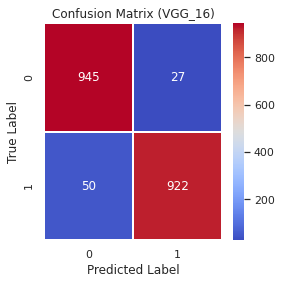

Accuracy: 0.9604
Precision: 0.9715
F1 Score: 0.9599
Cohen Kappa Score: 0.9208
ROC AUC Score: 0.9604
Recall: 0.9486
		Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       972
           1       0.97      0.95      0.96       972

    accuracy                           0.96      1944
   macro avg       0.96      0.96      0.96      1944
weighted avg       0.96      0.96      0.96      1944



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,'VGG_16')

7/7 [==============================] - 0s 65ms/step - loss: 0.1566 - accuracy: 0.9491
Score train:  [0.15660206973552704, 0.9490740895271301]


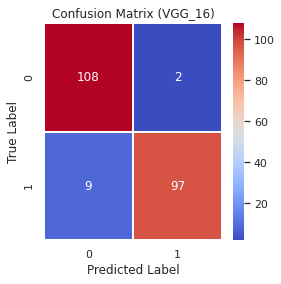

Accuracy: 0.9491
Precision: 0.9798
F1 Score: 0.9463
Cohen Kappa Score: 0.898
ROC AUC Score: 0.9485
Recall: 0.9151
		Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       110
           1       0.98      0.92      0.95       106

    accuracy                           0.95       216
   macro avg       0.95      0.95      0.95       216
weighted avg       0.95      0.95      0.95       216



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,'VGG_16')

8/8 [==============================] - 1s 63ms/step - loss: 0.1613 - accuracy: 0.9375
Score train:  [0.16132096946239471, 0.9375]


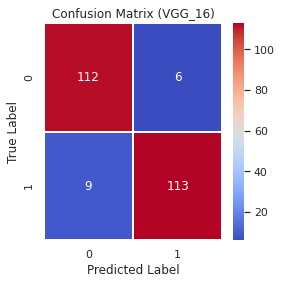

Accuracy: 0.9375
Precision: 0.9496
F1 Score: 0.9378
Cohen Kappa Score: 0.875
ROC AUC Score: 0.9377
Recall: 0.9262
		Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       118
           1       0.95      0.93      0.94       122

    accuracy                           0.94       240
   macro avg       0.94      0.94      0.94       240
weighted avg       0.94      0.94      0.94       240



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,'VGG_16')
    

#2-CNN


In [ ]:
name = '2-CNN'
# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11944000  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

'''history=model_3_hidden.fit_generator((X_train,y_train),
                         steps_per_epoch = 100,
                         epochs = 25,
                         validation_data = X_test,y_test)
'''
history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Epoch 1/15
41/41 [==============================] - 4s 106ms/step - loss: 0.7077 - accuracy: 0.7241 - val_loss: 0.3314 - val_accuracy: 0.8767
Epoch 2/15
41/41 [==============================] - 4s 95ms/step - loss: 0.2301 - accuracy: 0.9093 - val_loss: 0.1704 - val_accuracy: 0.9247
Epoch 3/15
41/41 [==============================] - 4s 94ms/step - loss: 0.1095 - accuracy: 0.9665 - val_loss: 0.1122 - val_accuracy: 0.9658
Epoch 4/15
41/41 [==============================] - 4s 97ms/step - loss: 0.0740 - accuracy: 0.9741 - val_loss: 0.1359 - val_accuracy: 0.9589
Epoch 5/15
41/41 [==============================] - 4s 96ms/step - loss: 0.0584 - accuracy: 0.9825 - val_loss: 0.1579 - val_accuracy: 0.9384
Epoch 6/15
41/41 [==============================] - 4s 95ms/step - loss: 0.0436 - accuracy: 0.9848 - val_loss: 0.1704 - val_accuracy: 0.9384
Epoch 7/15
41/41 [==============================] - 4s 95ms/step - loss: 0.0255 - accuracy: 0.9939 - val_loss: 0.1456 - val_accuracy: 0.9521
Epoch 8/15
4

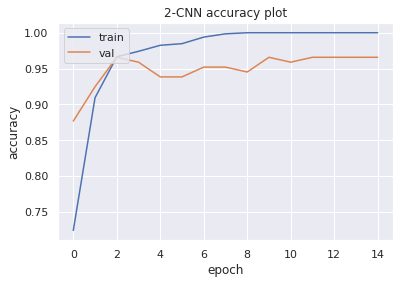

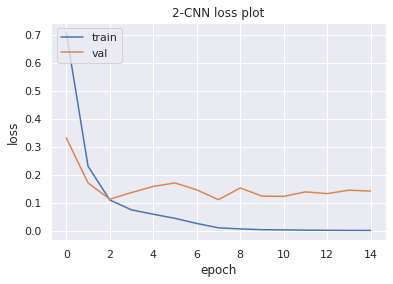

In [ ]:
plot (name)

46/46 [==============================] - 2s 35ms/step - loss: 0.0145 - accuracy: 0.9966
Score train:  [0.014520450495183468, 0.9965706467628479]


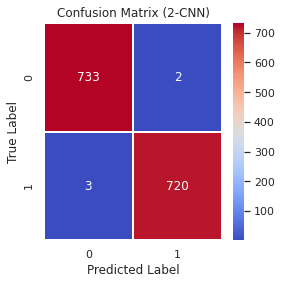

Accuracy: 0.9966
Precision: 0.9972
F1 Score: 0.9965
Cohen Kappa Score: 0.9931
ROC AUC Score: 0.9966
Recall: 0.9959
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      1.00      1.00       723

    accuracy                           1.00      1458
   macro avg       1.00      1.00      1.00      1458
weighted avg       1.00      1.00      1.00      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 0s 26ms/step - loss: 0.3634 - accuracy: 0.9568
Score train:  [0.36340591311454773, 0.9567901492118835]


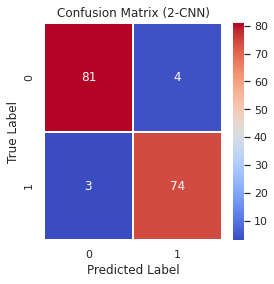

Accuracy: 0.9568
Precision: 0.9487
F1 Score: 0.9548
Cohen Kappa Score: 0.9134
ROC AUC Score: 0.957
Recall: 0.961
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96        85
           1       0.95      0.96      0.95        77

    accuracy                           0.96       162
   macro avg       0.96      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 0s 27ms/step - loss: 0.2224 - accuracy: 0.9611
Score train:  [0.22235116362571716, 0.9611111283302307]


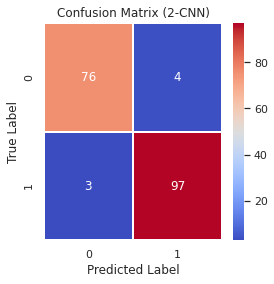

Accuracy: 0.9611
Precision: 0.9604
F1 Score: 0.9652
Cohen Kappa Score: 0.9212
ROC AUC Score: 0.96
Recall: 0.97
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96        80
           1       0.96      0.97      0.97       100

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#3-CNN


In [ ]:
name = '3-CNN'
# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a third convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))


# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)            

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

'''history=model_3_hidden.fit_generator((X_train,y_train),
                         steps_per_epoch = 100,
                         epochs = 25,
                         validation_data = X_test,y_test)
'''
history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Epoch 1/15
41/41 [==============================] - 4s 88ms/step - loss: 0.5980 - accuracy: 0.6692 - val_loss: 0.2672 - val_accuracy: 0.9041
Epoch 2/15
41/41 [==============================] - 3s 82ms/step - loss: 0.2616 - accuracy: 0.9070 - val_loss: 0.1924 - val_accuracy: 0.9315
Epoch 3/15
41/41 [==============================] - 3s 82ms/step - loss: 0.1621 - accuracy: 0.9444 - val_loss: 0.1305 - val_accuracy: 0.9521
Epoch 4/15
41/41 [==============================] - 3s 83ms/step - loss: 0.1203 - accuracy: 0.9581 - val_loss: 0.0997 - val_accuracy: 0.9589
Epoch 5/15
41/41 [==============================] - 3s 83ms/step - loss: 0.1016 - accuracy: 0.9657 - val_loss: 0.1893 - val_accuracy: 0.9452
Epoch 6/15
41/41 [==============================] - 3s 84ms/step - loss: 0.0890 - accuracy: 0.9657 - val_loss: 0.1847 - val_accuracy: 0.9452
Epoch 7/15
41/41 [==============================] - 3s 82ms/step - loss: 0.0832 - accuracy: 0.9672 - val_loss: 0.1723 - val_accuracy: 0.9521
Epoch 8/15
41

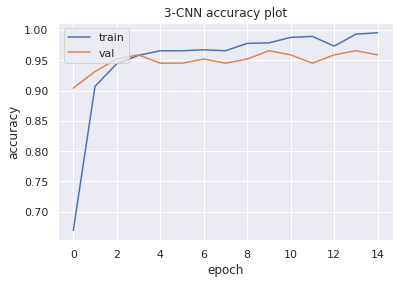

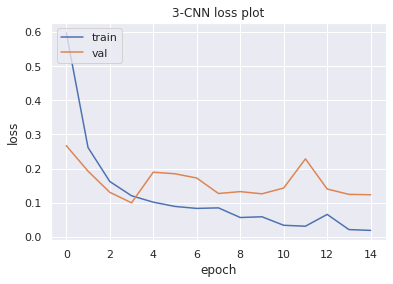

In [ ]:
plot (name)

46/46 [==============================] - 1s 32ms/step - loss: 0.0214 - accuracy: 0.9945
Score train:  [0.02137901447713375, 0.9945130348205566]


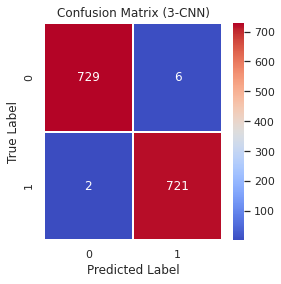

Accuracy: 0.9945
Precision: 0.9917
F1 Score: 0.9945
Cohen Kappa Score: 0.989
ROC AUC Score: 0.9945
Recall: 0.9972
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       735
           1       0.99      1.00      0.99       723

    accuracy                           0.99      1458
   macro avg       0.99      0.99      0.99      1458
weighted avg       0.99      0.99      0.99      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 0s 23ms/step - loss: 0.3105 - accuracy: 0.9444
Score train:  [0.310488224029541, 0.9444444179534912]


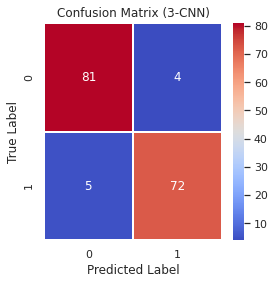

Accuracy: 0.9444
Precision: 0.9474
F1 Score: 0.9412
Cohen Kappa Score: 0.8885
ROC AUC Score: 0.944
Recall: 0.9351
		Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95        85
           1       0.95      0.94      0.94        77

    accuracy                           0.94       162
   macro avg       0.94      0.94      0.94       162
weighted avg       0.94      0.94      0.94       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 0s 25ms/step - loss: 0.1386 - accuracy: 0.9722
Score train:  [0.1386142522096634, 0.9722222089767456]


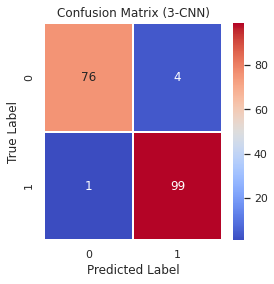

Accuracy: 0.9722
Precision: 0.9612
F1 Score: 0.9754
Cohen Kappa Score: 0.9435
ROC AUC Score: 0.97
Recall: 0.99
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        80
           1       0.96      0.99      0.98       100

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#4-CNN


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a third convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a fourth convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)       

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

'''history=model_3_hidden.fit_generator((X_train,y_train),
                         steps_per_epoch = 100,
                         epochs = 25,
                         validation_data = X_test,y_test)
'''
history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Train on 1312 samples, validate on 146 samples
Epoch 1/15
1312/1312 [==============================] - 4s 3ms/step - loss: 0.6231 - accuracy: 0.6216 - val_loss: 0.4576 - val_accuracy: 0.8630
Epoch 2/15
1312/1312 [==============================] - 4s 3ms/step - loss: 0.2829 - accuracy: 0.8956 - val_loss: 0.1184 - val_accuracy: 0.9623
Epoch 3/15
1312/1312 [==============================] - 4s 3ms/step - loss: 0.1343 - accuracy: 0.9535 - val_loss: 0.1248 - val_accuracy: 0.9555
Epoch 4/15
1312/1312 [==============================] - 4s 3ms/step - loss: 0.1123 - accuracy: 0.9607 - val_loss: 0.1057 - val_accuracy: 0.9555
Epoch 5/15
1312/1312 [==============================] - 4s 3ms/step - loss: 0.1104 - accuracy: 0.9592 - val_loss: 0.1145 - val_accuracy: 0.9521
Epoch 6/15
1312/1312 [==============================] - 4s 3ms/step - loss: 0.1307 - accuracy: 0.9493 - val_loss: 0.2437 - val_accuracy: 0.9110
Epoch 7/15
1312/1312 [==============================] - 4s 3ms/step - loss: 0.1128 - accu

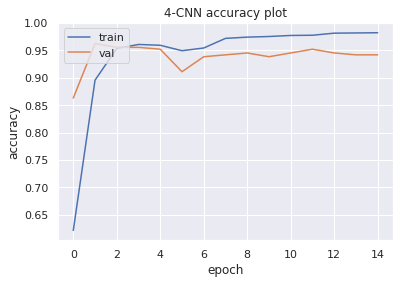

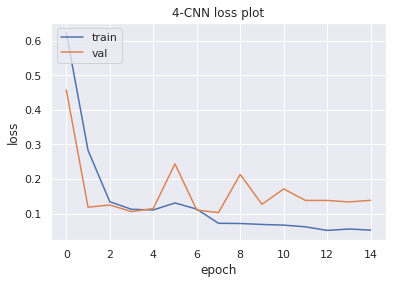

In [ ]:
plot ('4-CNN')

1458/1458 [==============================] - 2s 1ms/step
Score train:  [0.04201025275618288, 0.9811385273933411]


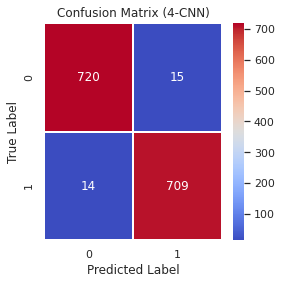

Accuracy: 0.9801
Precision: 0.9793
F1 Score: 0.98
Cohen Kappa Score: 0.9602
ROC AUC Score: 0.9801
Recall: 0.9806
		Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       735
           1       0.98      0.98      0.98       723

    accuracy                           0.98      1458
   macro avg       0.98      0.98      0.98      1458
weighted avg       0.98      0.98      0.98      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,'4-CNN')

162/162 [==============================] - 0s 1ms/step
Score train:  [0.18175764669851763, 0.9567901492118835]


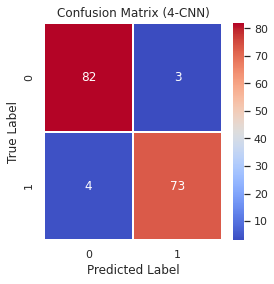

Accuracy: 0.9568
Precision: 0.9605
F1 Score: 0.9542
Cohen Kappa Score: 0.9133
ROC AUC Score: 0.9564
Recall: 0.9481
		Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96        85
           1       0.96      0.95      0.95        77

    accuracy                           0.96       162
   macro avg       0.96      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,'4-CNN')

180/180 [==============================] - 0s 1ms/step
Score train:  [0.09817422297265795, 0.9722222089767456]


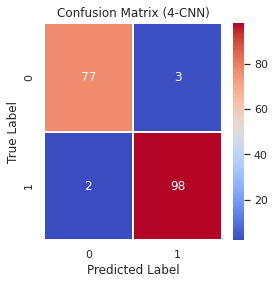

Accuracy: 0.9722
Precision: 0.9703
F1 Score: 0.9751
Cohen Kappa Score: 0.9437
ROC AUC Score: 0.9712
Recall: 0.98
		Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        80
           1       0.97      0.98      0.98       100

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,'4-CNN')
    

#5-CNN


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(16, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a third convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a fourth convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a fifth convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 16)      2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 64)        9280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)       

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

'''history=model_3_hidden.fit_generator((X_train,y_train),
                         steps_per_epoch = 100,
                         epochs = 25,
                         validation_data = X_test,y_test)
'''
history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Train on 1312 samples, validate on 146 samples
Epoch 1/15
1312/1312 [==============================] - 4s 3ms/step - loss: 0.6263 - accuracy: 0.6155 - val_loss: 0.3716 - val_accuracy: 0.9178
Epoch 2/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.3505 - accuracy: 0.8548 - val_loss: 0.1356 - val_accuracy: 0.9418
Epoch 3/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.1582 - accuracy: 0.9405 - val_loss: 0.1101 - val_accuracy: 0.9589
Epoch 4/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.1284 - accuracy: 0.9478 - val_loss: 0.0954 - val_accuracy: 0.9589
Epoch 5/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.0963 - accuracy: 0.9642 - val_loss: 0.1035 - val_accuracy: 0.9589
Epoch 6/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.0792 - accuracy: 0.9688 - val_loss: 0.1236 - val_accuracy: 0.9555
Epoch 7/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.0859 - accu

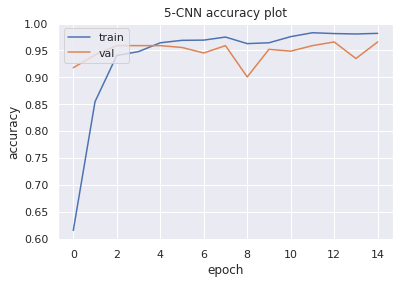

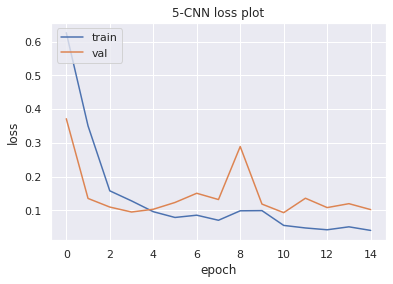

In [ ]:
plot ('5-CNN')

1458/1458 [==============================] - 2s 1ms/step
Score train:  [0.0276803306977179, 0.9924554228782654]


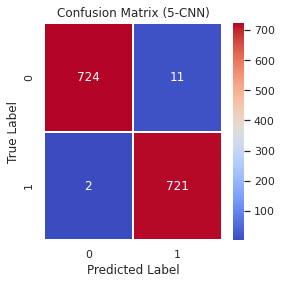

Accuracy: 0.9911
Precision: 0.985
F1 Score: 0.9911
Cohen Kappa Score: 0.9822
ROC AUC Score: 0.9911
Recall: 0.9972
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       735
           1       0.98      1.00      0.99       723

    accuracy                           0.99      1458
   macro avg       0.99      0.99      0.99      1458
weighted avg       0.99      0.99      0.99      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,'5-CNN')

162/162 [==============================] - 0s 1ms/step
Score train:  [0.16754139630577328, 0.9413580298423767]


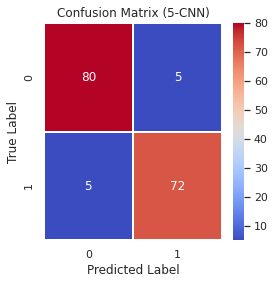

Accuracy: 0.9383
Precision: 0.9351
F1 Score: 0.9351
Cohen Kappa Score: 0.8762
ROC AUC Score: 0.9381
Recall: 0.9351
		Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        85
           1       0.94      0.94      0.94        77

    accuracy                           0.94       162
   macro avg       0.94      0.94      0.94       162
weighted avg       0.94      0.94      0.94       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,'5-CNN')

180/180 [==============================] - 0s 1ms/step
Score train:  [0.11023259245687062, 0.9666666388511658]


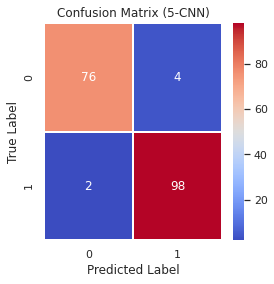

Accuracy: 0.9667
Precision: 0.9608
F1 Score: 0.9703
Cohen Kappa Score: 0.9323
ROC AUC Score: 0.965
Recall: 0.98
		Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        80
           1       0.96      0.98      0.97       100

    accuracy                           0.97       180
   macro avg       0.97      0.96      0.97       180
weighted avg       0.97      0.97      0.97       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,'5-CNN')
    

#6-CNN


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(16, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a third convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a fourth convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a fifth convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a sixth convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 16)      2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 64)        9280      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)       

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

'''history=model_3_hidden.fit_generator((X_train,y_train),
                         steps_per_epoch = 100,
                         epochs = 25,
                         validation_data = X_test,y_test)
'''
history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Train on 1312 samples, validate on 146 samples
Epoch 1/15
1312/1312 [==============================] - 3s 3ms/step - loss: 0.6940 - accuracy: 0.5137 - val_loss: 0.6875 - val_accuracy: 0.5411
Epoch 2/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.6489 - accuracy: 0.6448 - val_loss: 0.4708 - val_accuracy: 0.7397
Epoch 3/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.3831 - accuracy: 0.8361 - val_loss: 0.3268 - val_accuracy: 0.8801
Epoch 4/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.2744 - accuracy: 0.8986 - val_loss: 0.2991 - val_accuracy: 0.8801
Epoch 5/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.2425 - accuracy: 0.9066 - val_loss: 0.2281 - val_accuracy: 0.9247
Epoch 6/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.2009 - accuracy: 0.9207 - val_loss: 0.2135 - val_accuracy: 0.9178
Epoch 7/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.1836 - accu

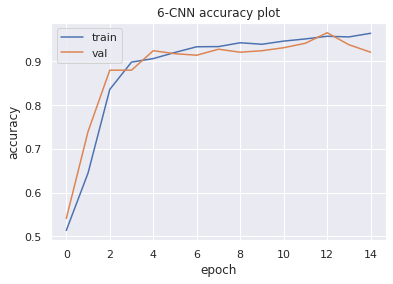

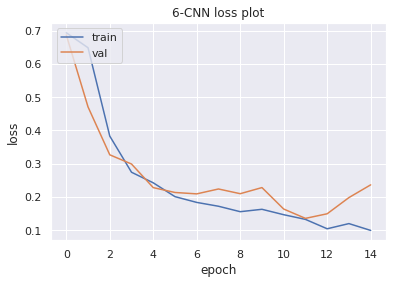

In [ ]:
plot ('6-CNN')

1458/1458 [==============================] - 2s 1ms/step
Score train:  [0.1545417544691324, 0.9344993233680725]


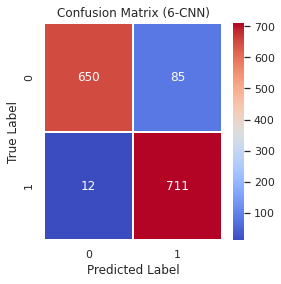

Accuracy: 0.9335
Precision: 0.8932
F1 Score: 0.9361
Cohen Kappa Score: 0.867
ROC AUC Score: 0.9339
Recall: 0.9834
		Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       735
           1       0.89      0.98      0.94       723

    accuracy                           0.93      1458
   macro avg       0.94      0.93      0.93      1458
weighted avg       0.94      0.93      0.93      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,'6-CNN')

162/162 [==============================] - 0s 1ms/step
Score train:  [0.24482777144437956, 0.9320987462997437]


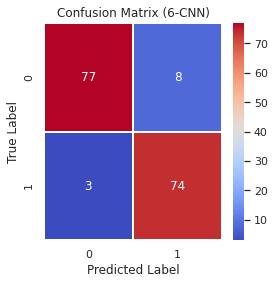

Accuracy: 0.9321
Precision: 0.9024
F1 Score: 0.9308
Cohen Kappa Score: 0.8643
ROC AUC Score: 0.9335
Recall: 0.961
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        85
           1       0.90      0.96      0.93        77

    accuracy                           0.93       162
   macro avg       0.93      0.93      0.93       162
weighted avg       0.93      0.93      0.93       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,'6-CNN')

180/180 [==============================] - 0s 1ms/step
Score train:  [0.12901903556452857, 0.9361110925674438]


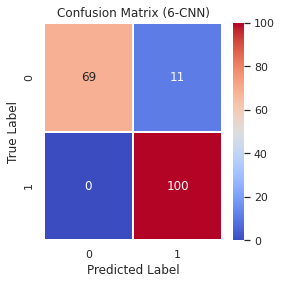

Accuracy: 0.9389
Precision: 0.9009
F1 Score: 0.9479
Cohen Kappa Score: 0.8745
ROC AUC Score: 0.9312
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        80
           1       0.90      1.00      0.95       100

    accuracy                           0.94       180
   macro avg       0.95      0.93      0.94       180
weighted avg       0.94      0.94      0.94       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,'6-CNN')
    

#7-CNN


In [ ]:
name = '7-CNN'
# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(16, (3, 3),padding='same', input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(32, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a third convolutional layer
model.add(Conv2D(32, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a fourth convolutional layer
model.add(Conv2D(32, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a fifth convolutional layer
model.add(Conv2D(64, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a sixth convolutional layer
model.add(Conv2D(64, (2, 2),padding='same' ,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a seventh convolutional layer
model.add(Conv2D(64, (2, 2),padding='same' ,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 32)        4128      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)       

In [ ]:
history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Train on 1312 samples, validate on 146 samples
Epoch 1/15
1312/1312 [==============================] - 4s 3ms/step - loss: 0.6888 - accuracy: 0.5248 - val_loss: 0.6579 - val_accuracy: 0.7534
Epoch 2/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.4660 - accuracy: 0.8060 - val_loss: 0.3291 - val_accuracy: 0.8630
Epoch 3/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.3123 - accuracy: 0.8834 - val_loss: 0.2325 - val_accuracy: 0.9075
Epoch 4/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.2614 - accuracy: 0.9097 - val_loss: 0.1942 - val_accuracy: 0.9315
Epoch 5/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.2302 - accuracy: 0.9192 - val_loss: 0.1363 - val_accuracy: 0.9623
Epoch 6/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.1976 - accuracy: 0.9238 - val_loss: 0.1244 - val_accuracy: 0.9555
Epoch 7/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.1586 - accu

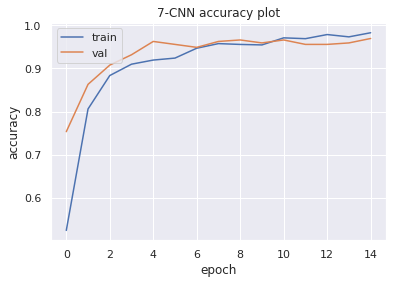

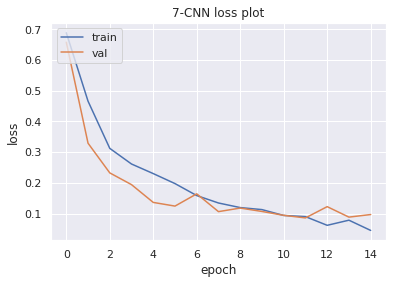

In [ ]:
plot (name)

1458/1458 [==============================] - 2s 1ms/step
Score train:  [0.037699663033006287, 0.9866254925727844]


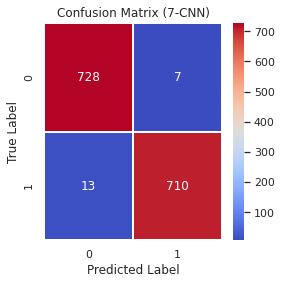

Accuracy: 0.9863
Precision: 0.9902
F1 Score: 0.9861
Cohen Kappa Score: 0.9726
ROC AUC Score: 0.9862
Recall: 0.982
		Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       735
           1       0.99      0.98      0.99       723

    accuracy                           0.99      1458
   macro avg       0.99      0.99      0.99      1458
weighted avg       0.99      0.99      0.99      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

162/162 [==============================] - 0s 1ms/step
Score train:  [0.20762994408350668, 0.9444444179534912]


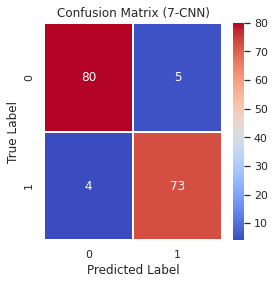

Accuracy: 0.9444
Precision: 0.9359
F1 Score: 0.9419
Cohen Kappa Score: 0.8887
ROC AUC Score: 0.9446
Recall: 0.9481
		Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95        85
           1       0.94      0.95      0.94        77

    accuracy                           0.94       162
   macro avg       0.94      0.94      0.94       162
weighted avg       0.94      0.94      0.94       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

180/180 [==============================] - 0s 1ms/step
Score train:  [0.16878098381890191, 0.9416666626930237]


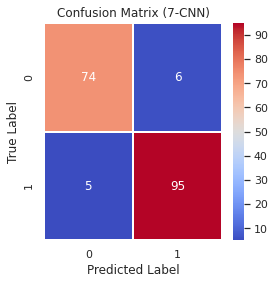

Accuracy: 0.9389
Precision: 0.9406
F1 Score: 0.9453
Cohen Kappa Score: 0.8761
ROC AUC Score: 0.9375
Recall: 0.95
		Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        80
           1       0.94      0.95      0.95       100

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#8-CNN


In [ ]:
name = '8-CNN'
# Initialising the CNN
model= Sequential()

# Step 1 - Convolution
model.add(Conv2D(16, (2, 2),padding='same', input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(32, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a third convolutional layer
model.add(Conv2D(32, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a fourth convolutional layer
model.add(Conv2D(48, (2, 2), padding='same',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a fifth convolutional layer
model.add(Conv2D(64, (2, 2), padding='same',activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a sixth convolutional layer
model.add(Conv2D(64, (2, 2),padding='same' ,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a seventh convolutional layer
model.add(Conv2D(64, (2, 2),padding='same' ,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Adding a eighth convolutional layer
model.add(Conv2D(64, (2, 2),padding='same' ,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 56, 56, 32)        4128      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 48)       

In [ ]:

history= model.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

Train on 1312 samples, validate on 146 samples
Epoch 1/15
1312/1312 [==============================] - 4s 3ms/step - loss: 0.6804 - accuracy: 0.5595 - val_loss: 0.5869 - val_accuracy: 0.7842
Epoch 2/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.4174 - accuracy: 0.8331 - val_loss: 0.3152 - val_accuracy: 0.8767
Epoch 3/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.2760 - accuracy: 0.9009 - val_loss: 0.2939 - val_accuracy: 0.8801
Epoch 4/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.2633 - accuracy: 0.9051 - val_loss: 0.1899 - val_accuracy: 0.9418
Epoch 5/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.2045 - accuracy: 0.9257 - val_loss: 0.1981 - val_accuracy: 0.9384
Epoch 6/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.1867 - accuracy: 0.9318 - val_loss: 0.1719 - val_accuracy: 0.9418
Epoch 7/15
1312/1312 [==============================] - 3s 2ms/step - loss: 0.1400 - accu

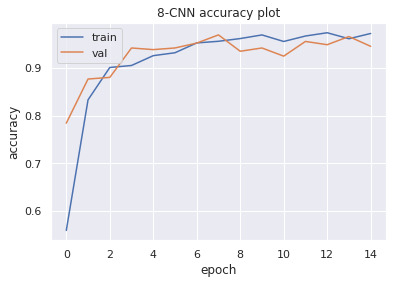

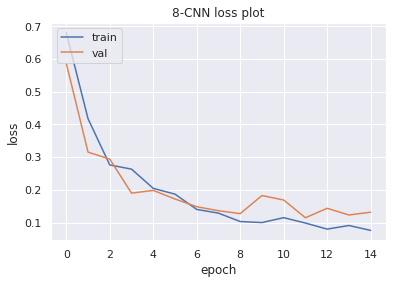

In [ ]:
plot (name)

1458/1458 [==============================] - 2s 1ms/step
Score train:  [0.053973415036096824, 0.9814814925193787]


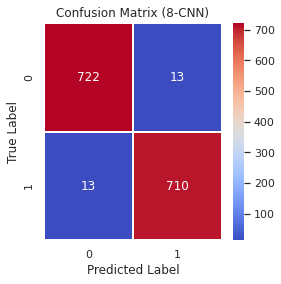

Accuracy: 0.9822
Precision: 0.982
F1 Score: 0.982
Cohen Kappa Score: 0.9643
ROC AUC Score: 0.9822
Recall: 0.982
		Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       735
           1       0.98      0.98      0.98       723

    accuracy                           0.98      1458
   macro avg       0.98      0.98      0.98      1458
weighted avg       0.98      0.98      0.98      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

162/162 [==============================] - 0s 1ms/step
Score train:  [0.10245248977397425, 0.9660493731498718]


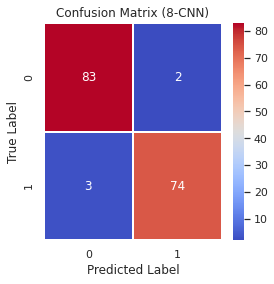

Accuracy: 0.9691
Precision: 0.9737
F1 Score: 0.9673
Cohen Kappa Score: 0.9381
ROC AUC Score: 0.9688
Recall: 0.961
		Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        85
           1       0.97      0.96      0.97        77

    accuracy                           0.97       162
   macro avg       0.97      0.97      0.97       162
weighted avg       0.97      0.97      0.97       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

180/180 [==============================] - 0s 1ms/step
Score train:  [0.13149445520506964, 0.9611111283302307]


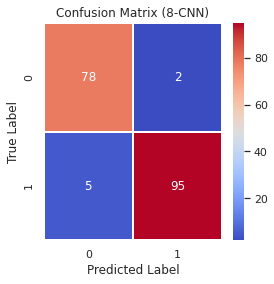

Accuracy: 0.9611
Precision: 0.9794
F1 Score: 0.9645
Cohen Kappa Score: 0.9215
ROC AUC Score: 0.9625
Recall: 0.95
		Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        80
           1       0.98      0.95      0.96       100

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#ResNet 50


In [ ]:
# load the ResNet 50 network, ensuring the head FC layer sets are left
# off

name = 'ResNet_50'
baseModel = ResNet50(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
# headModel = GlobalAveragePooling2D()(headModel)
headModel = Flatten(name="flatten")(headModel)
# headModel = Dropout(0.1)(headModel)
headModel = Dense(128, activation="relu")(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=40, verbose=1, validation_split=0.1,steps_per_epoch=80)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


[INFO] compiling model...
[INFO] training head...
Epoch 1/40
80/80 [==============================] - 5s 63ms/step - loss: 0.6663 - accuracy: 0.6095 - val_loss: 0.5943 - val_accuracy: 0.6154
Epoch 2/40
80/80 [==============================] - 4s 52ms/step - loss: 0.5951 - accuracy: 0.6741 - val_loss: 0.5539 - val_accuracy: 0.6564
Epoch 3/40
80/80 [==============================] - 4s 52ms/step - loss: 0.5277 - accuracy: 0.7639 - val_loss: 0.4791 - val_accuracy: 0.8103
Epoch 4/40
80/80 [==============================] - 4s 52ms/step - loss: 0.4662 - accuracy: 0.8136 - val_loss: 0.5450 - val_accuracy: 0.6615
Epoch 5/40
80/80 [==============================] - 4s 52ms/step - loss: 0.4665 - accuracy: 0.8062 - val_loss: 0.4624 - val_accuracy: 0.7487
Epoch 6/40
80/80 [==============================] - 4s 52ms/step - loss: 0.4616 - accuracy: 0.8016 - val_loss: 0.4219 - val_accuracy: 0.8256
Epoch 7/40
80/80 [==============================] - 4s 52ms/step - loss: 0.4358 - accuracy: 0.8170 - val

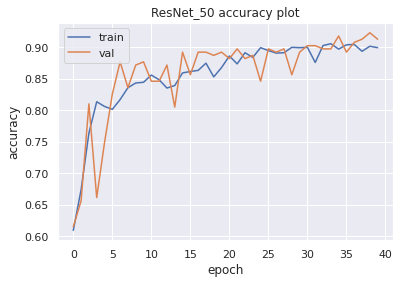

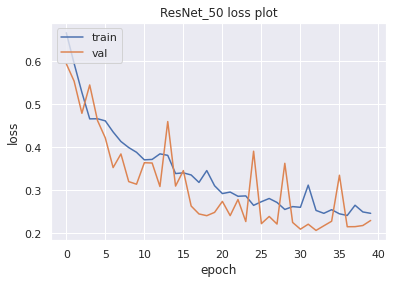

In [ ]:
plot('ResNet_50')

61/61 [==============================] - 3s 55ms/step - loss: 0.2349 - accuracy: 0.9079
Score train:  [0.23487931489944458, 0.9079217910766602]


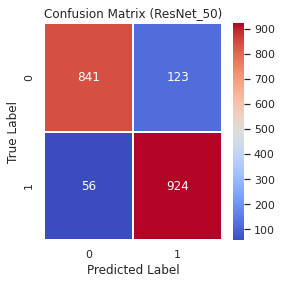

Accuracy: 0.9079
Precision: 0.8825
F1 Score: 0.9117
Cohen Kappa Score: 0.8157
ROC AUC Score: 0.9076
Recall: 0.9429
		Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       964
           1       0.88      0.94      0.91       980

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,'ResNet_50')

7/7 [==============================] - 0s 46ms/step - loss: 0.2384 - accuracy: 0.9120
Score train:  [0.23839613795280457, 0.9120370149612427]


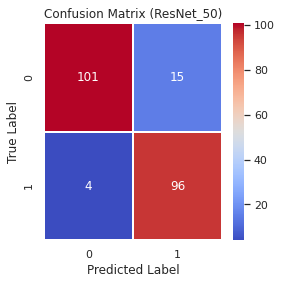

Accuracy: 0.912
Precision: 0.8649
F1 Score: 0.91
Cohen Kappa Score: 0.8244
ROC AUC Score: 0.9153
Recall: 0.96
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       116
           1       0.86      0.96      0.91       100

    accuracy                           0.91       216
   macro avg       0.91      0.92      0.91       216
weighted avg       0.92      0.91      0.91       216



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

8/8 [==============================] - 0s 46ms/step - loss: 0.2870 - accuracy: 0.8833
Score train:  [0.286984384059906, 0.8833333253860474]


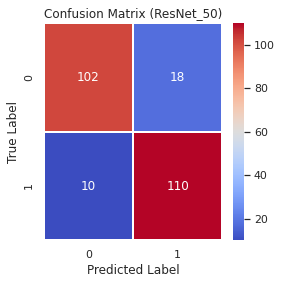

Accuracy: 0.8833
Precision: 0.8594
F1 Score: 0.8871
Cohen Kappa Score: 0.7667
ROC AUC Score: 0.8833
Recall: 0.9167
		Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       120
           1       0.86      0.92      0.89       120

    accuracy                           0.88       240
   macro avg       0.89      0.88      0.88       240
weighted avg       0.89      0.88      0.88       240



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#MobileNet


In [ ]:
# load the MobileNet network, ensuring the head FC layer sets are left
# off

name = 'MobileNet'
baseModel = MobileNet(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
# headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


17227776/17225924 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
46/46 [==============================] - 5s 112ms/step - loss: 0.3134 - accuracy: 0.8621 - val_loss: 0.1914 - val_accuracy: 0.9383
Epoch 2/20
46/46 [==============================] - 4s 86ms/step - loss: 0.1182 - accuracy: 0.9520 - val_loss: 0.1944 - val_accuracy: 0.9383
Epoch 3/20
46/46 [==============================] - 4s 87ms/step - loss: 0.0863 - accuracy: 0.9698 - val_loss: 0.1725 - val_accuracy: 0.9321
Epoch 4/20
46/46 [==============================] - 4s 87ms/step - loss: 0.0517 - accuracy: 0.9856 - val_loss: 0.2053 - val_accuracy: 0.9444
Epoch 5/20
46/46 [==============================] - 4s 86ms/step - loss: 0.0491 - accuracy: 0.9870 - val_loss: 0.2086 - val_accuracy: 0.9383
Epoch 6/20
46/46 [==============================] - 4s 87ms/step - loss: 0.0301 - accuracy: 0.9938 - val_loss: 0.1979 - val_accuracy: 0.9321
Epoch 7/20
46/46 [====================

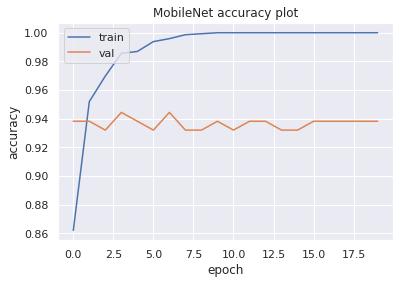

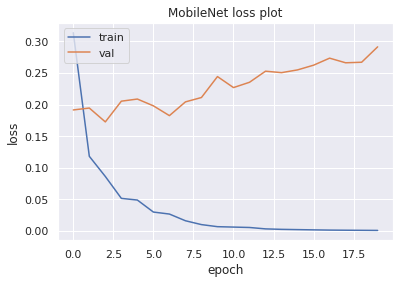

In [ ]:
plot(name)

51/51 [==============================] - 4s 72ms/step - loss: 0.0300 - accuracy: 0.9938
Score train:  [0.03003399260342121, 0.9938271641731262]


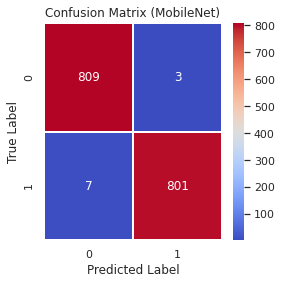

Accuracy: 0.9938
Precision: 0.9963
F1 Score: 0.9938
Cohen Kappa Score: 0.9877
ROC AUC Score: 0.9938
Recall: 0.9913
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       812
           1       1.00      0.99      0.99       808

    accuracy                           0.99      1620
   macro avg       0.99      0.99      0.99      1620
weighted avg       0.99      0.99      0.99      1620



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 0s 56ms/step - loss: 0.1246 - accuracy: 0.9667
Score train:  [0.12456832826137543, 0.9666666388511658]


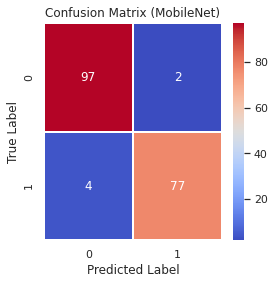

Accuracy: 0.9667
Precision: 0.9747
F1 Score: 0.9625
Cohen Kappa Score: 0.9325
ROC AUC Score: 0.9652
Recall: 0.9506
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        99
           1       0.97      0.95      0.96        81

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

7/7 [==============================] - 0s 54ms/step - loss: 0.1171 - accuracy: 0.9650
Score train:  [0.11712928116321564, 0.9649999737739563]


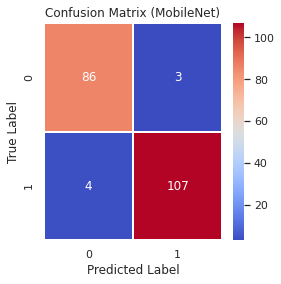

Accuracy: 0.965
Precision: 0.9727
F1 Score: 0.9683
Cohen Kappa Score: 0.9292
ROC AUC Score: 0.9651
Recall: 0.964
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        89
           1       0.97      0.96      0.97       111

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#MobileNetV2


In [ ]:
# load the MMobileNetV2 network, ensuring the head FC layer sets are left
# off

name = 'MobileNetV2'
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
# headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


[INFO] compiling model...
[INFO] training head...
Epoch 1/20
41/41 [==============================] - 5s 120ms/step - loss: 0.2882 - accuracy: 0.8636 - val_loss: 0.1640 - val_accuracy: 0.9110
Epoch 2/20
41/41 [==============================] - 4s 97ms/step - loss: 0.1301 - accuracy: 0.9527 - val_loss: 0.0692 - val_accuracy: 0.9726
Epoch 3/20
41/41 [==============================] - 4s 97ms/step - loss: 0.0996 - accuracy: 0.9627 - val_loss: 0.1481 - val_accuracy: 0.9315
Epoch 4/20
41/41 [==============================] - 4s 96ms/step - loss: 0.0710 - accuracy: 0.9764 - val_loss: 0.0571 - val_accuracy: 0.9795
Epoch 5/20
41/41 [==============================] - 4s 97ms/step - loss: 0.0523 - accuracy: 0.9855 - val_loss: 0.0687 - val_accuracy: 0.9726
Epoch 6/20
41/41 [==============================] - 4s 97ms/step - loss: 0.0447 - accuracy: 0.9886 - val_loss: 0.0631 - val_accuracy: 0.9658
Epoch 7/20
41/41 [==============================] - 4s 95ms/step - loss: 0.0423 - accuracy: 0.9878 - va

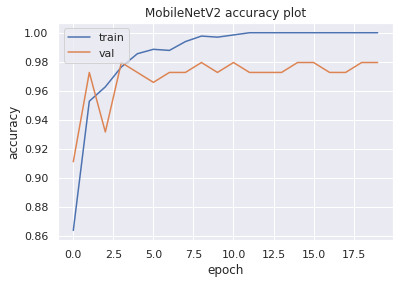

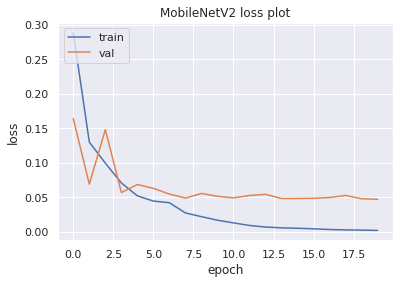

In [ ]:
plot(name)

46/46 [==============================] - 4s 80ms/step - loss: 0.0066 - accuracy: 0.9979
Score train:  [0.006602439563721418, 0.9979423880577087]


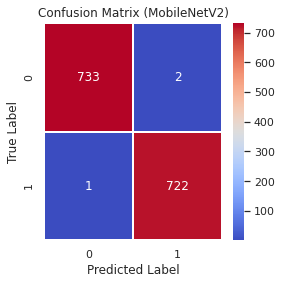

Accuracy: 0.9979
Precision: 0.9972
F1 Score: 0.9979
Cohen Kappa Score: 0.9959
ROC AUC Score: 0.9979
Recall: 0.9986
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       735
           1       1.00      1.00      1.00       723

    accuracy                           1.00      1458
   macro avg       1.00      1.00      1.00      1458
weighted avg       1.00      1.00      1.00      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 0s 55ms/step - loss: 0.2181 - accuracy: 0.9630
Score train:  [0.21806257963180542, 0.9629629850387573]


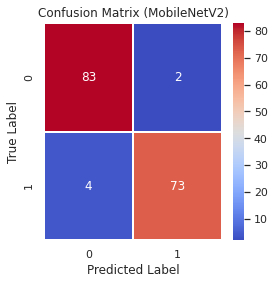

Accuracy: 0.963
Precision: 0.9733
F1 Score: 0.9605
Cohen Kappa Score: 0.9257
ROC AUC Score: 0.9623
Recall: 0.9481
		Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        85
           1       0.97      0.95      0.96        77

    accuracy                           0.96       162
   macro avg       0.96      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 0s 63ms/step - loss: 0.1593 - accuracy: 0.9389
Score train:  [0.15926937758922577, 0.9388889074325562]


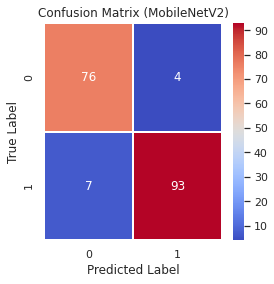

Accuracy: 0.9389
Precision: 0.9588
F1 Score: 0.9442
Cohen Kappa Score: 0.8767
ROC AUC Score: 0.94
Recall: 0.93
		Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93        80
           1       0.96      0.93      0.94       100

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#VGG19


In [ ]:
# load the VGG19 network, ensuring the head FC layer sets are left
# off

name = 'VGG_19'
baseModel = VGG19(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
# headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


[INFO] compiling model...
[INFO] training head...
Epoch 1/20
41/41 [==============================] - 17s 426ms/step - loss: 0.4149 - accuracy: 0.8331 - val_loss: 0.2808 - val_accuracy: 0.8904
Epoch 2/20
41/41 [==============================] - 15s 372ms/step - loss: 0.2697 - accuracy: 0.8918 - val_loss: 0.2672 - val_accuracy: 0.9041
Epoch 3/20
41/41 [==============================] - 15s 373ms/step - loss: 0.2332 - accuracy: 0.9139 - val_loss: 0.1723 - val_accuracy: 0.9315
Epoch 4/20
41/41 [==============================] - 15s 372ms/step - loss: 0.1901 - accuracy: 0.9314 - val_loss: 0.1855 - val_accuracy: 0.9247
Epoch 5/20
41/41 [==============================] - 15s 373ms/step - loss: 0.1756 - accuracy: 0.9405 - val_loss: 0.1354 - val_accuracy: 0.9384
Epoch 6/20
41/41 [==============================] - 15s 373ms/step - loss: 0.1651 - accuracy: 0.9405 - val_loss: 0.1319 - val_accuracy: 0.9452
Epoch 7/20
41/41 [==============================] - 15s 372ms/step - loss: 0.1757 - accuracy

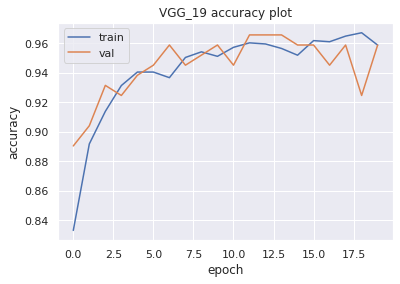

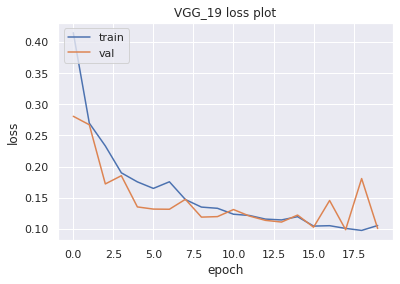

In [ ]:
plot(name)

46/46 [==============================] - 15s 327ms/step - loss: 0.0994 - accuracy: 0.9664
Score train:  [0.09935033321380615, 0.9663923382759094]


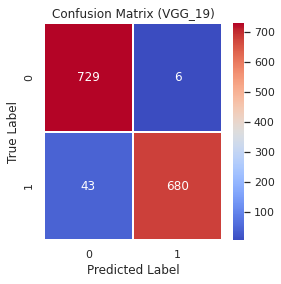

Accuracy: 0.9664
Precision: 0.9913
F1 Score: 0.9652
Cohen Kappa Score: 0.9328
ROC AUC Score: 0.9662
Recall: 0.9405
		Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       735
           1       0.99      0.94      0.97       723

    accuracy                           0.97      1458
   macro avg       0.97      0.97      0.97      1458
weighted avg       0.97      0.97      0.97      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 1s 232ms/step - loss: 0.1245 - accuracy: 0.9753
Score train:  [0.12450569868087769, 0.9753086566925049]


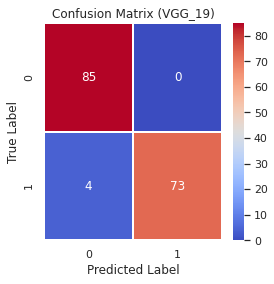

Accuracy: 0.9753
Precision: 1.0
F1 Score: 0.9733
Cohen Kappa Score: 0.9504
ROC AUC Score: 0.974
Recall: 0.9481
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        85
           1       1.00      0.95      0.97        77

    accuracy                           0.98       162
   macro avg       0.98      0.97      0.98       162
weighted avg       0.98      0.98      0.98       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 2s 269ms/step - loss: 0.1251 - accuracy: 0.9611
Score train:  [0.12514013051986694, 0.9611111283302307]


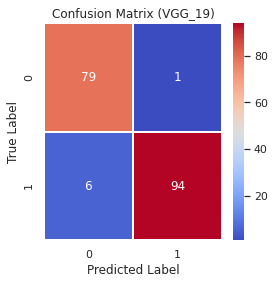

Accuracy: 0.9611
Precision: 0.9895
F1 Score: 0.9641
Cohen Kappa Score: 0.9217
ROC AUC Score: 0.9638
Recall: 0.94
		Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        80
           1       0.99      0.94      0.96       100

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#Xception


In [ ]:
# load the Xception network, ensuring the head FC layer sets are left
# off

name = 'Xception'
baseModel = Xception(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)

print('CV accuracy:' , np.average(history.history['val_accuracy'])) 

83689472/83683744 [==============================] - 1s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
41/41 [==============================] - 5s 123ms/step - loss: 0.3151 - accuracy: 0.8651 - val_loss: 0.2197 - val_accuracy: 0.9384
Epoch 2/20
41/41 [==============================] - 4s 90ms/step - loss: 0.1513 - accuracy: 0.9482 - val_loss: 0.1846 - val_accuracy: 0.9315
Epoch 3/20
41/41 [==============================] - 4s 90ms/step - loss: 0.1290 - accuracy: 0.9512 - val_loss: 0.1936 - val_accuracy: 0.9315
Epoch 4/20
41/41 [==============================] - 4s 90ms/step - loss: 0.1211 - accuracy: 0.9588 - val_loss: 0.1983 - val_accuracy: 0.9452
Epoch 5/20
41/41 [==============================] - 4s 90ms/step - loss: 0.1206 - accuracy: 0.9596 - val_loss: 0.1726 - val_accuracy: 0.9452
Epoch 6/20
41/41 [==============================] - 4s 91ms/step - loss: 0.0854 - accuracy: 0.9718 - val_loss: 0.1592 - val_accuracy: 0.9521
Epoch 7/20
41/41 [====================

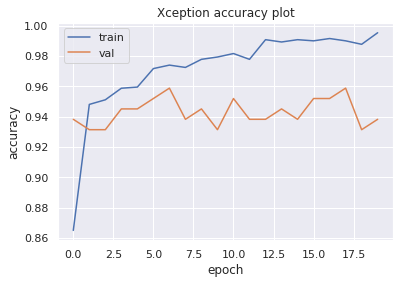

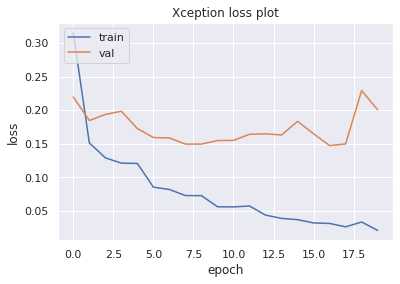

In [ ]:
plot(name)

46/46 [==============================] - 3s 76ms/step - loss: 0.0310 - accuracy: 0.9925
Score train:  [0.03104114718735218, 0.9924554228782654]


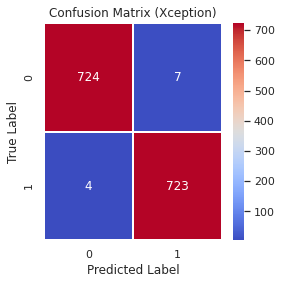

Accuracy: 0.9925
Precision: 0.9904
F1 Score: 0.9925
Cohen Kappa Score: 0.9849
ROC AUC Score: 0.9925
Recall: 0.9945
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       731
           1       0.99      0.99      0.99       727

    accuracy                           0.99      1458
   macro avg       0.99      0.99      0.99      1458
weighted avg       0.99      0.99      0.99      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 0s 53ms/step - loss: 0.1397 - accuracy: 0.9691
Score train:  [0.13969247043132782, 0.9691358208656311]


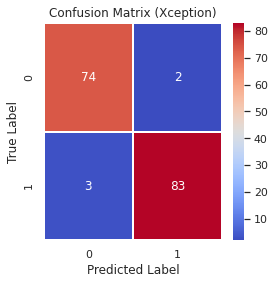

Accuracy: 0.9691
Precision: 0.9765
F1 Score: 0.9708
Cohen Kappa Score: 0.9381
ROC AUC Score: 0.9694
Recall: 0.9651
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.98      0.97      0.97        86

    accuracy                           0.97       162
   macro avg       0.97      0.97      0.97       162
weighted avg       0.97      0.97      0.97       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 0s 60ms/step - loss: 0.1549 - accuracy: 0.9556
Score train:  [0.15485040843486786, 0.9555555582046509]


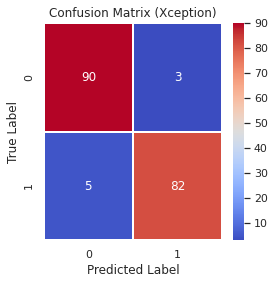

Accuracy: 0.9556
Precision: 0.9647
F1 Score: 0.9535
Cohen Kappa Score: 0.9109
ROC AUC Score: 0.9551
Recall: 0.9425
		Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        93
           1       0.96      0.94      0.95        87

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#InceptionV3


In [ ]:
# load the InceptionV3 network, ensuring the head FC layer sets are left
# off

name = 'InceptionV3'
baseModel = InceptionV3(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


87916544/87910968 [==============================] - 1s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
41/41 [==============================] - 10s 244ms/step - loss: 0.4874 - accuracy: 0.8079 - val_loss: 0.2361 - val_accuracy: 0.9041
Epoch 2/20
41/41 [==============================] - 7s 179ms/step - loss: 0.2075 - accuracy: 0.9169 - val_loss: 0.1847 - val_accuracy: 0.9247
Epoch 3/20
41/41 [==============================] - 7s 179ms/step - loss: 0.1774 - accuracy: 0.9352 - val_loss: 0.1252 - val_accuracy: 0.9452
Epoch 4/20
41/41 [==============================] - 7s 181ms/step - loss: 0.1512 - accuracy: 0.9444 - val_loss: 0.0940 - val_accuracy: 0.9726
Epoch 5/20
41/41 [==============================] - 7s 182ms/step - loss: 0.1393 - accuracy: 0.9520 - val_loss: 0.0996 - val_accuracy: 0.9726
Epoch 6/20
41/41 [==============================] - 7s 181ms/step - loss: 0.1296 - accuracy: 0.9527 - val_loss: 0.0813 - val_accuracy: 0.9863
Epoch 7/20
41/41 [==============

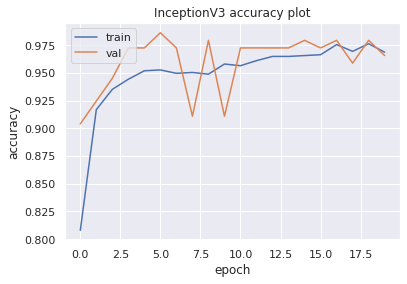

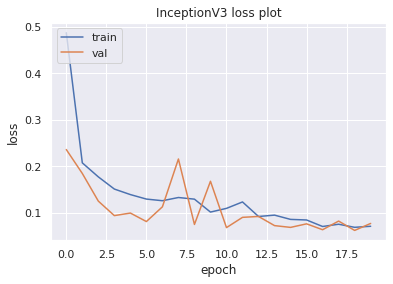

In [ ]:
plot(name)

46/46 [==============================] - 7s 156ms/step - loss: 0.0455 - accuracy: 0.9842
Score train:  [0.045451730489730835, 0.9842249751091003]


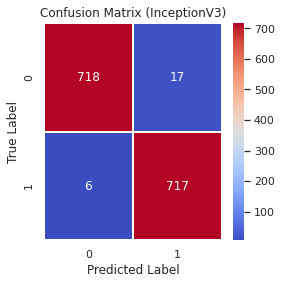

Accuracy: 0.9842
Precision: 0.9768
F1 Score: 0.9842
Cohen Kappa Score: 0.9685
ROC AUC Score: 0.9843
Recall: 0.9917
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       735
           1       0.98      0.99      0.98       723

    accuracy                           0.98      1458
   macro avg       0.98      0.98      0.98      1458
weighted avg       0.98      0.98      0.98      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 1s 112ms/step - loss: 0.1507 - accuracy: 0.9383
Score train:  [0.15070126950740814, 0.9382715821266174]


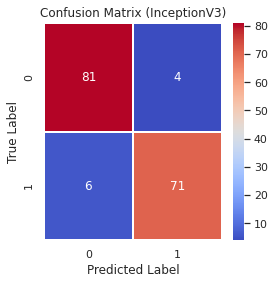

Accuracy: 0.9383
Precision: 0.9467
F1 Score: 0.9342
Cohen Kappa Score: 0.8761
ROC AUC Score: 0.9375
Recall: 0.9221
		Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        85
           1       0.95      0.92      0.93        77

    accuracy                           0.94       162
   macro avg       0.94      0.94      0.94       162
weighted avg       0.94      0.94      0.94       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 1s 123ms/step - loss: 0.2316 - accuracy: 0.9222
Score train:  [0.2316388040781021, 0.9222221970558167]


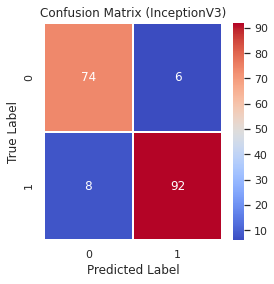

Accuracy: 0.9222
Precision: 0.9388
F1 Score: 0.9293
Cohen Kappa Score: 0.8429
ROC AUC Score: 0.9225
Recall: 0.92
		Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        80
           1       0.94      0.92      0.93       100

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#InceptionResNetV2


In [ ]:
# load the InceptionResNetV2 network, ensuring the head FC layer sets are left
# off

name = 'InceptionResNetV2'
baseModel = InceptionResNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


219062272/219055592 [==============================] - 3s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
41/41 [==============================] - 9s 225ms/step - loss: 0.6518 - accuracy: 0.7774 - val_loss: 0.3080 - val_accuracy: 0.8562
Epoch 2/20
41/41 [==============================] - 5s 126ms/step - loss: 0.2356 - accuracy: 0.9047 - val_loss: 0.2629 - val_accuracy: 0.8904
Epoch 3/20
41/41 [==============================] - 5s 127ms/step - loss: 0.2116 - accuracy: 0.9139 - val_loss: 0.2661 - val_accuracy: 0.8973
Epoch 4/20
41/41 [==============================] - 5s 127ms/step - loss: 0.1919 - accuracy: 0.9261 - val_loss: 0.2404 - val_accuracy: 0.8836
Epoch 5/20
41/41 [==============================] - 5s 127ms/step - loss: 0.1891 - accuracy: 0.9284 - val_loss: 0.2197 - val_accuracy: 0.9110
Epoch 6/20
41/41 [==============================] - 5s 127ms/step - loss: 0.2010 - accuracy: 0.9245 - val_loss: 0.2085 - val_accuracy: 0.9247
Epoch 7/20
41/41 [=============

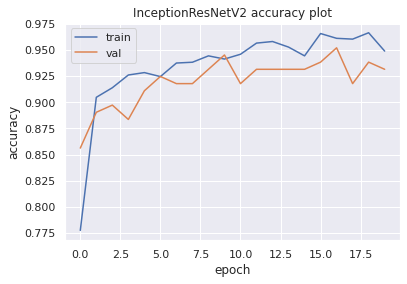

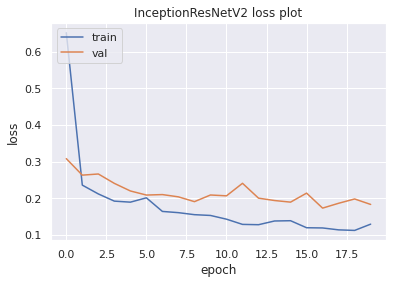

In [ ]:
plot(name)

46/46 [==============================] - 5s 108ms/step - loss: 0.1012 - accuracy: 0.9636
Score train:  [0.10117031633853912, 0.9636488556861877]


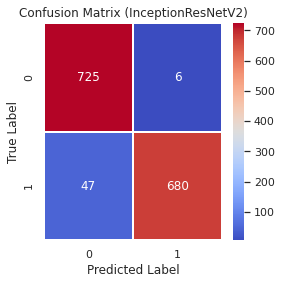

Accuracy: 0.9636
Precision: 0.9913
F1 Score: 0.9625
Cohen Kappa Score: 0.9273
ROC AUC Score: 0.9636
Recall: 0.9354
		Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       731
           1       0.99      0.94      0.96       727

    accuracy                           0.96      1458
   macro avg       0.97      0.96      0.96      1458
weighted avg       0.97      0.96      0.96      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 0s 79ms/step - loss: 0.1562 - accuracy: 0.9444
Score train:  [0.15620483458042145, 0.9444444179534912]


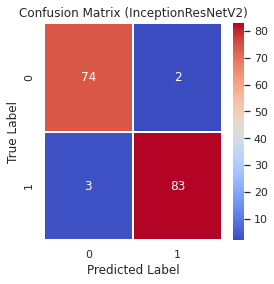

Accuracy: 0.9691
Precision: 0.9765
F1 Score: 0.9708
Cohen Kappa Score: 0.9381
ROC AUC Score: 0.9694
Recall: 0.9651
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.98      0.97      0.97        86

    accuracy                           0.97       162
   macro avg       0.97      0.97      0.97       162
weighted avg       0.97      0.97      0.97       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 1s 87ms/step - loss: 0.0827 - accuracy: 0.9667
Score train:  [0.08273418992757797, 0.9666666388511658]


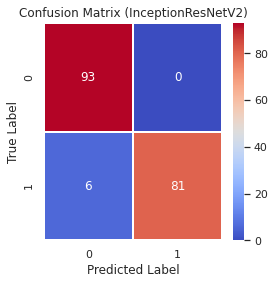

Accuracy: 0.9667
Precision: 1.0
F1 Score: 0.9643
Cohen Kappa Score: 0.9331
ROC AUC Score: 0.9655
Recall: 0.931
		Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        93
           1       1.00      0.93      0.96        87

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#DenseNet169


In [ ]:
# load the DenseNet169 network, ensuring the head FC layer sets are left
# off

name = 'DenseNet169'
baseModel = DenseNet169(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


51879936/51877672 [==============================] - 1s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
41/41 [==============================] - 7s 167ms/step - loss: 0.3433 - accuracy: 0.8598 - val_loss: 0.2360 - val_accuracy: 0.8973
Epoch 2/20
41/41 [==============================] - 3s 81ms/step - loss: 0.1669 - accuracy: 0.9375 - val_loss: 0.1662 - val_accuracy: 0.9452
Epoch 3/20
41/41 [==============================] - 3s 81ms/step - loss: 0.1256 - accuracy: 0.9466 - val_loss: 0.2015 - val_accuracy: 0.8699
Epoch 4/20
41/41 [==============================] - 3s 81ms/step - loss: 0.1207 - accuracy: 0.9558 - val_loss: 0.1405 - val_accuracy: 0.9384
Epoch 5/20
41/41 [==============================] - 3s 81ms/step - loss: 0.0972 - accuracy: 0.9611 - val_loss: 0.1287 - val_accuracy: 0.9521
Epoch 6/20
41/41 [==============================] - 3s 81ms/step - loss: 0.0811 - accuracy: 0.9748 - val_loss: 0.1470 - val_accuracy: 0.9452
Epoch 7/20
41/41 [====================

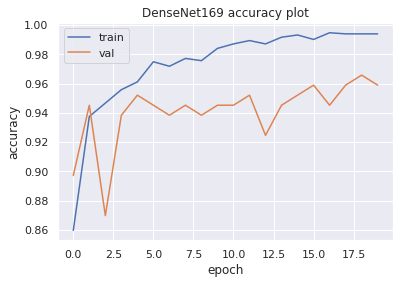

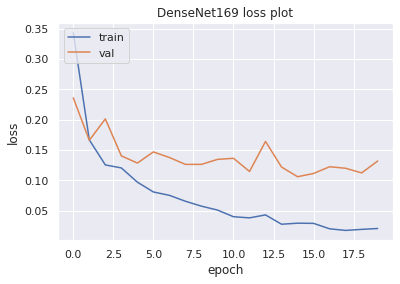

In [ ]:
plot(name)

46/46 [==============================] - 3s 67ms/step - loss: 0.0190 - accuracy: 0.9952
Score train:  [0.019035931676626205, 0.9951989054679871]


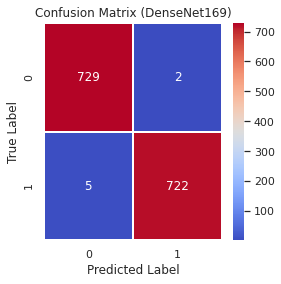

Accuracy: 0.9952
Precision: 0.9972
F1 Score: 0.9952
Cohen Kappa Score: 0.9904
ROC AUC Score: 0.9952
Recall: 0.9931
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       731
           1       1.00      0.99      1.00       727

    accuracy                           1.00      1458
   macro avg       1.00      1.00      1.00      1458
weighted avg       1.00      1.00      1.00      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 0s 49ms/step - loss: 0.1634 - accuracy: 0.9444
Score train:  [0.16337183117866516, 0.9444444179534912]


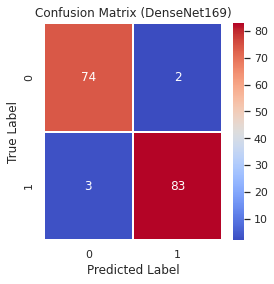

Accuracy: 0.9691
Precision: 0.9765
F1 Score: 0.9708
Cohen Kappa Score: 0.9381
ROC AUC Score: 0.9694
Recall: 0.9651
		Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        76
           1       0.98      0.97      0.97        86

    accuracy                           0.97       162
   macro avg       0.97      0.97      0.97       162
weighted avg       0.97      0.97      0.97       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 0s 54ms/step - loss: 0.1040 - accuracy: 0.9667
Score train:  [0.10397200286388397, 0.9666666388511658]


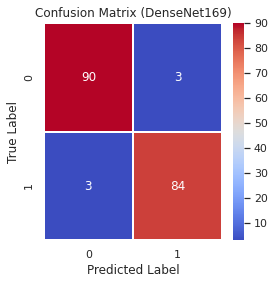

Accuracy: 0.9667
Precision: 0.9655
F1 Score: 0.9655
Cohen Kappa Score: 0.9333
ROC AUC Score: 0.9666
Recall: 0.9655
		Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        93
           1       0.97      0.97      0.97        87

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#DenseNet121


In [ ]:
# load the DenseNet121 network, ensuring the head FC layer sets are left
# off

name = 'DenseNet121'
baseModel = DenseNet121(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)

model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

for layer in baseModel.layers:
	layer.trainable = False

# compile our model

print("[INFO] compiling model...")
opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


# train the head of the network

print("[INFO] training head...")
history= model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy'])) 


29089792/29084464 [==============================] - 0s 0us/step
[INFO] compiling model...
[INFO] training head...
Epoch 1/20
41/41 [==============================] - 5s 118ms/step - loss: 0.3893 - accuracy: 0.8369 - val_loss: 0.1966 - val_accuracy: 0.9315
Epoch 2/20
41/41 [==============================] - 3s 65ms/step - loss: 0.1901 - accuracy: 0.9253 - val_loss: 0.2485 - val_accuracy: 0.9247
Epoch 3/20
41/41 [==============================] - 3s 66ms/step - loss: 0.1583 - accuracy: 0.9405 - val_loss: 0.1582 - val_accuracy: 0.9384
Epoch 4/20
41/41 [==============================] - 3s 66ms/step - loss: 0.1283 - accuracy: 0.9505 - val_loss: 0.1608 - val_accuracy: 0.9452
Epoch 5/20
41/41 [==============================] - 3s 65ms/step - loss: 0.1239 - accuracy: 0.9459 - val_loss: 0.1341 - val_accuracy: 0.9384
Epoch 6/20
41/41 [==============================] - 3s 66ms/step - loss: 0.1132 - accuracy: 0.9573 - val_loss: 0.1410 - val_accuracy: 0.9521
Epoch 7/20
41/41 [====================

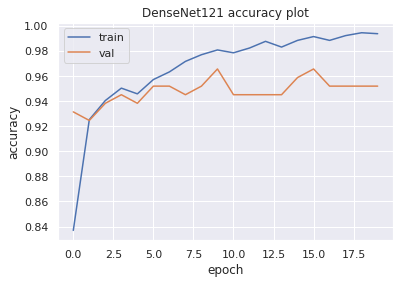

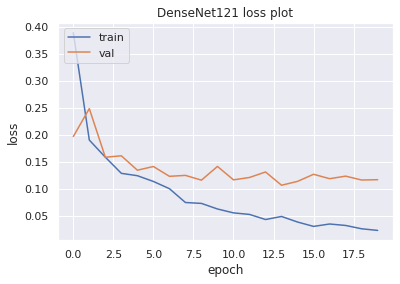

In [ ]:
plot(name)

46/46 [==============================] - 2s 54ms/step - loss: 0.0222 - accuracy: 0.9945
Score train:  [0.02222207747399807, 0.9945130348205566]


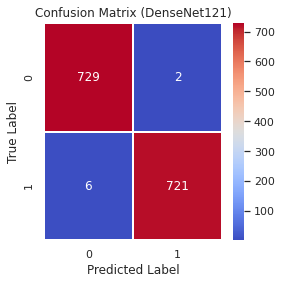

Accuracy: 0.9945
Precision: 0.9972
F1 Score: 0.9945
Cohen Kappa Score: 0.989
ROC AUC Score: 0.9945
Recall: 0.9917
		Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       731
           1       1.00      0.99      0.99       727

    accuracy                           0.99      1458
   macro avg       0.99      0.99      0.99      1458
weighted avg       0.99      0.99      0.99      1458



In [ ]:
y_pred_train = model.predict(X_train)
print('Score train: ', model.evaluate(X_train, y_train))
result(y_train,y_pred_train,name)

6/6 [==============================] - 0s 38ms/step - loss: 0.1673 - accuracy: 0.9444
Score train:  [0.1672814041376114, 0.9444444179534912]


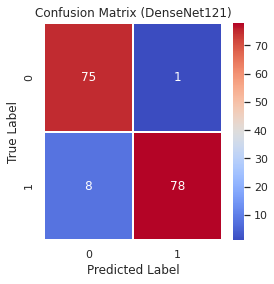

Accuracy: 0.9444
Precision: 0.9873
F1 Score: 0.9455
Cohen Kappa Score: 0.8891
ROC AUC Score: 0.9469
Recall: 0.907
		Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        76
           1       0.99      0.91      0.95        86

    accuracy                           0.94       162
   macro avg       0.95      0.95      0.94       162
weighted avg       0.95      0.94      0.94       162



In [ ]:
y_pred_val = model.predict(X_val)
print('Score train: ', model.evaluate(X_val, y_val))
result(y_val,y_pred_val,name)

6/6 [==============================] - 0s 42ms/step - loss: 0.1748 - accuracy: 0.9444
Score train:  [0.17479278147220612, 0.9444444179534912]


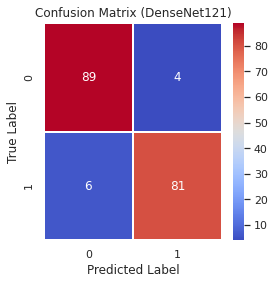

Accuracy: 0.9444
Precision: 0.9529
F1 Score: 0.9419
Cohen Kappa Score: 0.8887
ROC AUC Score: 0.944
Recall: 0.931
		Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        93
           1       0.95      0.93      0.94        87

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



In [ ]:
y_pred_test = model.predict(X_test)
print('Score train: ', model.evaluate(X_test, y_test))
result(y_test,y_pred_test,name)
    

#AdaBoostClassifier

In [ ]:
name = 'AdaBoostClassifier'
baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = GlobalAveragePooling2D()(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="tanh")(headModel)
headModel = Dense(128, activation='relu')(headModel)
predictions = Dense(8, activation='sigmoid')(headModel)
headModel = Dropout(0.1)(headModel)
# predictions = Dense(2, activation='tanh')(headModel)


trans_model = Model(inputs=baseModel.input, outputs=predictions)
trans_train = trans_model.predict(X_train)
model = AdaBoostClassifier()
model.fit(trans_train, np.argmax(y_train, axis=1))


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Score train:  0.8596


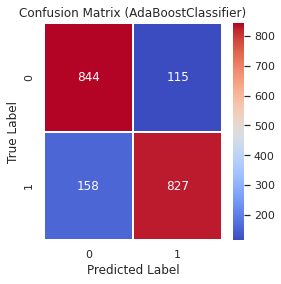

Accuracy: 0.8596
Precision: 0.8779
F1 Score: 0.8583
Cohen Kappa Score: 0.7193
ROC AUC Score: 0.8598
Recall: 0.8396
		Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       959
           1       0.88      0.84      0.86       985

    accuracy                           0.86      1944
   macro avg       0.86      0.86      0.86      1944
weighted avg       0.86      0.86      0.86      1944



In [ ]:
y_pred_train = model.predict(trans_train)
print('Score train: ', np.round(model.score(trans_train, np.argmax(y_train, axis=1)),4))
result_1(y_train,y_pred_train,name)

Score train:  0.8194


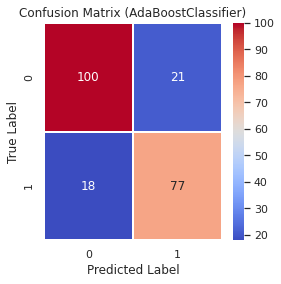

Accuracy: 0.8194
Precision: 0.7857
F1 Score: 0.7979
Cohen Kappa Score: 0.6348
ROC AUC Score: 0.8185
Recall: 0.8105
		Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       121
           1       0.79      0.81      0.80        95

    accuracy                           0.82       216
   macro avg       0.82      0.82      0.82       216
weighted avg       0.82      0.82      0.82       216



In [ ]:
trans_val = trans_model.predict(X_val)
y_pred_val = model.predict(trans_val)
print('Score train: ', np.round(model.score(trans_val, np.argmax(y_val, axis=1)),4))
result_1(y_val,y_pred_val,name)

Score train:  0.8625


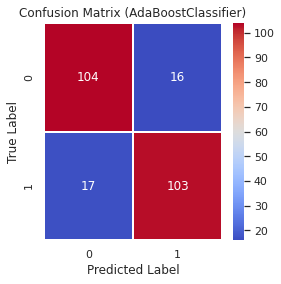

Accuracy: 0.8625
Precision: 0.8655
F1 Score: 0.8619
Cohen Kappa Score: 0.725
ROC AUC Score: 0.8625
Recall: 0.8583
		Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       120
           1       0.87      0.86      0.86       120

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



In [ ]:
trans_test = trans_model.predict(X_test)
y_pred_test = model.predict(trans_test)
print('Score train: ', np.round(model.score(trans_test, np.argmax(y_test, axis=1)),4))
result_1(y_test,y_pred_test,name)
    

#KNeighborsClassifier

In [ ]:
name = 'KNeighborsClassifier'
baseModel =VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = GlobalAveragePooling2D()(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="tanh")(headModel)
headModel = Dense(128, activation='relu')(headModel)
predictions = Dense(8, activation='sigmoid')(headModel)
# headModel = Dropout(0.4)(headModel)
# predictions = Dense(2, activation='tanh')(headModel)


trans_model = Model(inputs=baseModel.input, outputs=predictions)
trans_train = trans_model.predict(X_train)
model = KNeighborsClassifier()
model.fit(trans_train, np.argmax(y_train, axis=1))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Score train:  0.8724


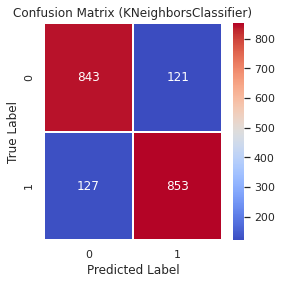

Accuracy: 0.8724
Precision: 0.8758
F1 Score: 0.8731
Cohen Kappa Score: 0.7449
ROC AUC Score: 0.8724
Recall: 0.8704
		Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       964
           1       0.88      0.87      0.87       980

    accuracy                           0.87      1944
   macro avg       0.87      0.87      0.87      1944
weighted avg       0.87      0.87      0.87      1944



In [ ]:
y_pred_train = model.predict(trans_train)
print('Score train: ', np.round(model.score(trans_train, np.argmax(y_train, axis=1)),4))
result_1(y_train,y_pred_train,name)

Score train:  0.8287


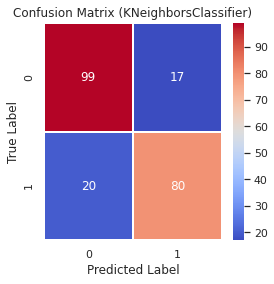

Accuracy: 0.8287
Precision: 0.8247
F1 Score: 0.8122
Cohen Kappa Score: 0.6548
ROC AUC Score: 0.8267
Recall: 0.8
		Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       116
           1       0.82      0.80      0.81       100

    accuracy                           0.83       216
   macro avg       0.83      0.83      0.83       216
weighted avg       0.83      0.83      0.83       216



In [ ]:
trans_val = trans_model.predict(X_val)
y_pred_val = model.predict(trans_val)
print('Score train: ', np.round(model.score(trans_val, np.argmax(y_val, axis=1)),4))
result_1(y_val,y_pred_val,name)

Score train:  0.8333


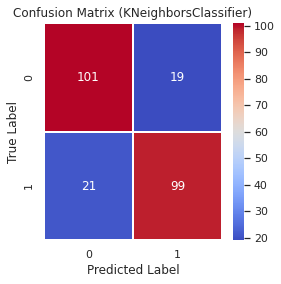

Accuracy: 0.8333
Precision: 0.839
F1 Score: 0.8319
Cohen Kappa Score: 0.6667
ROC AUC Score: 0.8333
Recall: 0.825
		Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       120
           1       0.84      0.82      0.83       120

    accuracy                           0.83       240
   macro avg       0.83      0.83      0.83       240
weighted avg       0.83      0.83      0.83       240



In [ ]:
trans_test = trans_model.predict(X_test)
y_pred_test = model.predict(trans_test)
print('Score train: ', np.round(model.score(trans_test, np.argmax(y_test, axis=1)),4))
result_1(y_test,y_pred_test,name)
    

#RandomForestClassifier

In [ ]:
name = 'RandomForestClassifier'
baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = GlobalAveragePooling2D()(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="tanh")(headModel)
headModel = Dense(128, activation='relu')(headModel)
predictions = Dense(8, activation='sigmoid')(headModel)
# headModel = Dropout(0.4)(headModel)
# predictions = Dense(2, activation='tanh')(headModel)


trans_model = Model(inputs=baseModel.input, outputs=predictions)
trans_train = trans_model.predict(X_train)
model =RandomForestClassifier()
model.fit(trans_train, np.argmax(y_train, axis=1))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Score train:  1.0


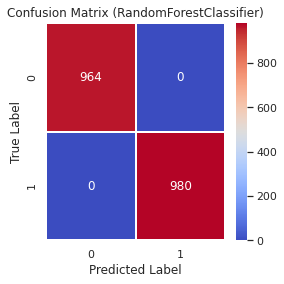

Accuracy: 1.0
Precision: 1.0
F1 Score: 1.0
Cohen Kappa Score: 1.0
ROC AUC Score: 1.0
Recall: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       964
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1944
   macro avg       1.00      1.00      1.00      1944
weighted avg       1.00      1.00      1.00      1944



In [ ]:
y_pred_train = model.predict(trans_train)
print('Score train: ', np.round(model.score(trans_train, np.argmax(y_train, axis=1)),4))
result_1(y_train,y_pred_train,name)

Score train:  0.8611


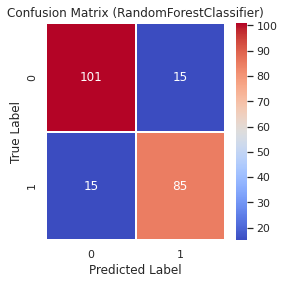

Accuracy: 0.8611
Precision: 0.85
F1 Score: 0.85
Cohen Kappa Score: 0.7207
ROC AUC Score: 0.8603
Recall: 0.85
		Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       116
           1       0.85      0.85      0.85       100

    accuracy                           0.86       216
   macro avg       0.86      0.86      0.86       216
weighted avg       0.86      0.86      0.86       216



In [ ]:
trans_val = trans_model.predict(X_val)
y_pred_val = model.predict(trans_val)
print('Score train: ', np.round(model.score(trans_val, np.argmax(y_val, axis=1)),4))
result_1(y_val,y_pred_val,name)

Score train:  0.8417


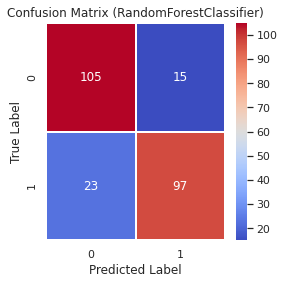

Accuracy: 0.8417
Precision: 0.8661
F1 Score: 0.8362
Cohen Kappa Score: 0.6833
ROC AUC Score: 0.8417
Recall: 0.8083
		Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       120
           1       0.87      0.81      0.84       120

    accuracy                           0.84       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.84      0.84      0.84       240



In [ ]:
trans_test = trans_model.predict(X_test)
y_pred_test = model.predict(trans_test)
print('Score train: ', np.round(model.score(trans_test, np.argmax(y_test, axis=1)),4))
result_1(y_test,y_pred_test,name)
    

#SVC

In [14]:
name = 'SVC'
baseModel =VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = GlobalAveragePooling2D()(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="tanh")(headModel)
headModel = Dense(128, activation='relu')(headModel)
predictions = Dense(8, activation='sigmoid')(headModel)
headModel = Dropout(0.1)(headModel)
# predictions = Dense(2, activation='tanh')(headModel)


trans_model = Model(inputs=baseModel.input, outputs=predictions)
trans_train = trans_model.predict(X_train)
model = SVC()
model.fit(trans_train, np.argmax(y_train, axis=1))


58892288/58889256 [==============================] - 0s 0us/step


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Score train:  0.8138


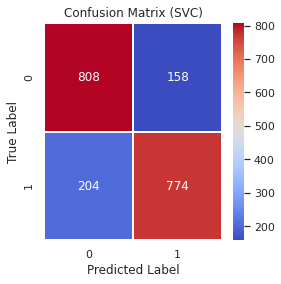

Accuracy: 0.8138
Precision: 0.8305
F1 Score: 0.8105
Cohen Kappa Score: 0.6277
ROC AUC Score: 0.8139
Recall: 0.7914
		Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       966
           1       0.83      0.79      0.81       978

    accuracy                           0.81      1944
   macro avg       0.81      0.81      0.81      1944
weighted avg       0.81      0.81      0.81      1944



In [15]:
y_pred_train = model.predict(trans_train)
print('Score train: ', np.round(model.score(trans_train, np.argmax(y_train, axis=1)),4))
result_1(y_train,y_pred_train,name)

Score train:  0.8009


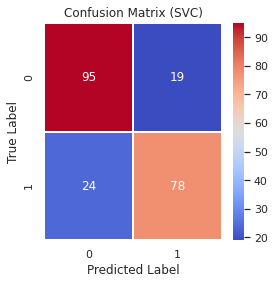

Accuracy: 0.8009
Precision: 0.8041
F1 Score: 0.7839
Cohen Kappa Score: 0.5996
ROC AUC Score: 0.799
Recall: 0.7647
		Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       114
           1       0.80      0.76      0.78       102

    accuracy                           0.80       216
   macro avg       0.80      0.80      0.80       216
weighted avg       0.80      0.80      0.80       216



In [16]:
trans_val = trans_model.predict(X_val)
y_pred_val = model.predict(trans_val)
print('Score train: ', np.round(model.score(trans_val, np.argmax(y_val, axis=1)),4))
result_1(y_val,y_pred_val,name)

Score train:  0.85


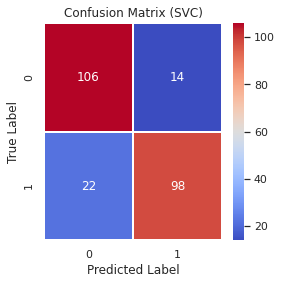

Accuracy: 0.85
Precision: 0.875
F1 Score: 0.8448
Cohen Kappa Score: 0.7
ROC AUC Score: 0.85
Recall: 0.8167
		Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       120
           1       0.88      0.82      0.84       120

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



In [17]:
trans_test = trans_model.predict(X_test)
y_pred_test = model.predict(trans_test)
print('Score train: ', np.round(model.score(trans_test, np.argmax(y_test, axis=1)),4))
result_1(y_test,y_pred_test,name)
    

#XGB

In [18]:
name = 'XGB'
baseModel =VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = GlobalAveragePooling2D()(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="tanh")(headModel)
headModel = Dense(128, activation='relu')(headModel)
predictions = Dense(8, activation='sigmoid')(headModel)
headModel = Dropout(0.2)(headModel)
# predictions = Dense(2, activation='tanh')(headModel)


trans_model = Model(inputs=baseModel.input, outputs=predictions)
trans_train = trans_model.predict(X_train)
model = XGBClassifier()
model.fit(trans_train, np.argmax(y_train, axis=1))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Score train:  0.9228


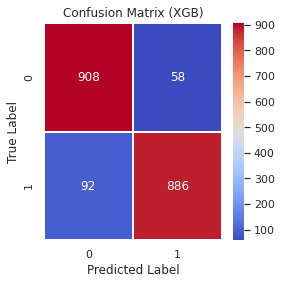

Accuracy: 0.9228
Precision: 0.9386
F1 Score: 0.922
Cohen Kappa Score: 0.8457
ROC AUC Score: 0.9229
Recall: 0.9059
		Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       966
           1       0.94      0.91      0.92       978

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944



In [19]:
y_pred_train = model.predict(trans_train)
print('Score train: ', np.round(model.score(trans_train, np.argmax(y_train, axis=1)),4))
result_1(y_train,y_pred_train,name)

Score train:  0.8657


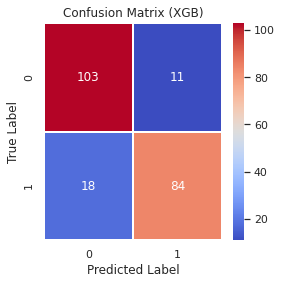

Accuracy: 0.8657
Precision: 0.8842
F1 Score: 0.8528
Cohen Kappa Score: 0.7297
ROC AUC Score: 0.8635
Recall: 0.8235
		Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       114
           1       0.88      0.82      0.85       102

    accuracy                           0.87       216
   macro avg       0.87      0.86      0.86       216
weighted avg       0.87      0.87      0.87       216



In [20]:
trans_val = trans_model.predict(X_val)
y_pred_val = model.predict(trans_val)
print('Score train: ', np.round(model.score(trans_val, np.argmax(y_val, axis=1)),4))
result_1(y_val,y_pred_val,name)

Score train:  0.9042


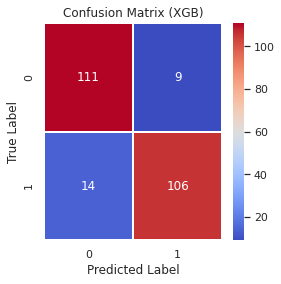

Accuracy: 0.9042
Precision: 0.9217
F1 Score: 0.9021
Cohen Kappa Score: 0.8083
ROC AUC Score: 0.9042
Recall: 0.8833
		Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       120
           1       0.92      0.88      0.90       120

    accuracy                           0.90       240
   macro avg       0.90      0.90      0.90       240
weighted avg       0.90      0.90      0.90       240



In [21]:
trans_test = trans_model.predict(X_test)
y_pred_test = model.predict(trans_test)
print('Score train: ', np.round(model.score(trans_test, np.argmax(y_test, axis=1)),4))
result_1(y_test,y_pred_test,name)
    

#ANN

In [ ]:
name = 'ANN'
baseModel =VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = GlobalAveragePooling2D()(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="tanh")(headModel)
headModel = Dense(128, activation='relu')(headModel)
predictions = Dense(8, activation='sigmoid')(headModel)
headModel = Dropout(0.4)(headModel)
# predictions = Dense(2, activation='tanh')(headModel)


trans_model = Model(inputs=baseModel.input, outputs=predictions)
trans_train = trans_model.predict(X_train)
model = AdaBoostClassifier()
model.fit(trans_train, np.argmax(y_train, axis=1))

model = Sequential()
model.add(Dense(units=8, activation='tanh', input_shape=(8,)))
model.add(Dense(units=4, activation='tanh'))
model.add(Dense(units=2 , activation='softmax'))


# model.add(Dense(5 , activation = 'relu'))
# model.add(Dense(5 , activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

model = Model(inputs=model.input, outputs=model.output)

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(trans_train, y_train, epochs=30, validation_split=0.1)
print('cv accuracy:' , np.average(history.history['val_accuracy'])) # Cross Validation

Epoch 1/30
55/55 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.4997 - val_loss: 0.6919 - val_accuracy: 0.5333
Epoch 2/30
55/55 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4906 - val_loss: 0.6939 - val_accuracy: 0.4718
Epoch 3/30
55/55 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5054 - val_loss: 0.6913 - val_accuracy: 0.5333
Epoch 4/30
55/55 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4951 - val_loss: 0.6897 - val_accuracy: 0.5333
Epoch 5/30
55/55 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5129 - val_loss: 0.6903 - val_accuracy: 0.6513
Epoch 6/30
55/55 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5552 - val_loss: 0.6882 - val_accuracy: 0.5333
Epoch 7/30
55/55 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5220 - val_loss: 0.6869 - val_accuracy: 0.5333
Epoch 8/30
55/55 [==

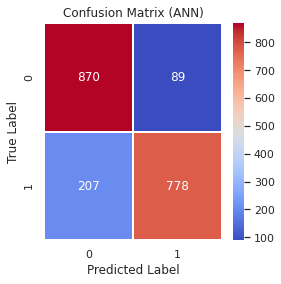

Accuracy: 0.8477
Precision: 0.8973
F1 Score: 0.8402
Cohen Kappa Score: 0.6959
ROC AUC Score: 0.8485
Recall: 0.7898
		Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85       959
           1       0.90      0.79      0.84       985

    accuracy                           0.85      1944
   macro avg       0.85      0.85      0.85      1944
weighted avg       0.85      0.85      0.85      1944



In [ ]:
y_pred_train = model.predict(trans_train)
#print('Score train: ', np.round(model.score(trans_train, np.argmax(y_train, axis=1)),4))
result(y_train,y_pred_train,name)

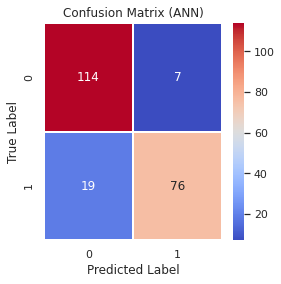

Accuracy: 0.8796
Precision: 0.9157
F1 Score: 0.8539
Cohen Kappa Score: 0.7524
ROC AUC Score: 0.8711
Recall: 0.8
		Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       121
           1       0.92      0.80      0.85        95

    accuracy                           0.88       216
   macro avg       0.89      0.87      0.88       216
weighted avg       0.88      0.88      0.88       216



In [ ]:
trans_val = trans_model.predict(X_val)
y_pred_val = model.predict(trans_val)
# print('Score train: ', np.round(model.score(trans_val, np.argmax(y_val, axis=1)),4))
result(y_val,y_pred_val,name)

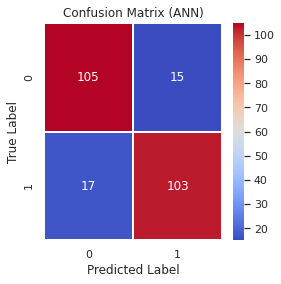

Accuracy: 0.8667
Precision: 0.8729
F1 Score: 0.8655
Cohen Kappa Score: 0.7333
ROC AUC Score: 0.8667
Recall: 0.8583
		Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       120
           1       0.87      0.86      0.87       120

    accuracy                           0.87       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.87      0.87      0.87       240



In [ ]:
trans_test = trans_model.predict(X_test)
y_pred_test = model.predict(trans_test)
# print('Score train: ', np.round(model.score(trans_test, np.argmax(y_test, axis=1)),4))
result(y_test,y_pred_test,name)
    